In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import asyncio
import websockets

In [63]:
import requests

# Documentation at https://developer.tdameritrade.com/option-chains/apis/get/marketdata/chains#
url = "https://api.tdameritrade.com/v1/marketdata/chains"
payload = {
    "apikey" : "KD9V5GHKLONKSCQBIUCSORPCUMSCOVOU",
    "symbol" : "VOO",
    "contractType" : "ALL",
    "strikeCount" : "10",
    "includeQuotes" : "TRUE",
    "range" : "ALL",
    #"fromDate" : "",
    #"toDate" : "2020-02-28",
    "expMonth" : "JUL",
    "optionType" : "ALL"
}

print("Sending request to {}".format(url))
response = requests.get(url, params=payload)

if (response.ok):
    print("Response is good")
else:
    print("FAILED")

Sending request to https://api.tdameritrade.com/v1/marketdata/chains
Response is good


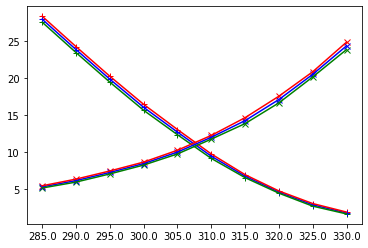

In [64]:
json = response.json()

prices = []
bids = []
asks = []
marks = []
for callExpDate in json["callExpDateMap"].items():
    expDate = callExpDate[0]
    for callPrice in callExpDate[1].items():
        price = callPrice[0]
        bid = callPrice[1][0]['bid']
        ask = callPrice[1][0]['ask']
        mark = callPrice[1][0]['mark']
        plt.plot(price, bid, "g+")
        plt.plot(price, ask, "r+")
        plt.plot(price, mark, "b+")
        prices.append(price)
        bids.append(bid)
        asks.append(ask)
        marks.append(mark)
    plt.plot(prices, marks, "b")
    plt.plot(prices, bids, "g")
    plt.plot(prices, asks, "r")

prices = []
bids = []
asks = []
marks = []
for callExpDate in json["putExpDateMap"].items():
    expDate = callExpDate[0]
    for callPrice in callExpDate[1].items():
        price = callPrice[0]
        bid = callPrice[1][0]['bid']
        ask = callPrice[1][0]['ask']
        mark = callPrice[1][0]['mark']
        plt.plot(price, bid, "gx")
        plt.plot(price, ask, "rx")
        plt.plot(price, mark, "bx")
        prices.append(price)
        bids.append(bid)
        asks.append(ask)
        marks.append(mark)
    plt.plot(prices, marks, "b")
    plt.plot(prices, bids, "g")
    plt.plot(prices, asks, "r")
        
plt.show()

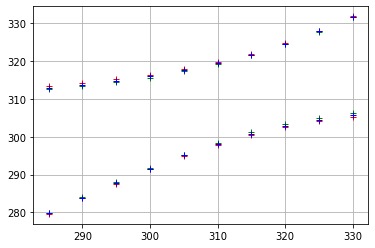

In [65]:
json = response.json()

for callExpDate in json["callExpDateMap"].items():
    expDate = callExpDate[0]
    for callPrice in callExpDate[1].items():
        price = float(callPrice[0])
        bid = float(callPrice[1][0]['bid'])
        ask = float(callPrice[1][0]['ask'])
        mark = float(callPrice[1][0]['mark'])
        plt.plot(price, price + bid, "g+")
        plt.plot(price, price + ask, "r+")
        plt.plot(price, price + mark, "b+")

for callExpDate in json["putExpDateMap"].items():
    expDate = callExpDate[0]
    for callPrice in callExpDate[1].items():
        price = float(callPrice[0])
        bid = float(callPrice[1][0]['bid'])
        ask = float(callPrice[1][0]['ask'])
        mark = float(callPrice[1][0]['mark'])
        plt.plot(price, price - bid, "g+")
        plt.plot(price, price - ask, "r+")
        plt.plot(price, price - mark, "b+")

plt.grid(True)
plt.show()

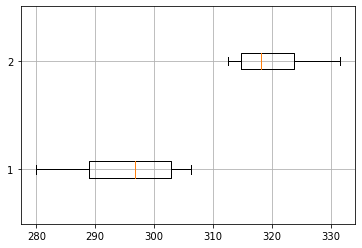

In [66]:
json = response.json()

lowerThan = []
higherThan = []
for callExpDate in json["callExpDateMap"].items():
    expDate = callExpDate[0]
    for callPrice in callExpDate[1].items():
        price = float(callPrice[0])
        bid = float(callPrice[1][0]['bid'])
        ask = float(callPrice[1][0]['ask'])
        mark = float(callPrice[1][0]['mark'])
        higherThan.append(price + bid)
#         lowerThan.append(price + ask)

for callExpDate in json["putExpDateMap"].items():
    expDate = callExpDate[0]
    for callPrice in callExpDate[1].items():
        price = float(callPrice[0])
        bid = float(callPrice[1][0]['bid'])
        ask = float(callPrice[1][0]['ask'])
        mark = float(callPrice[1][0]['mark'])
        lowerThan.append(price - bid)
#         higherThan.append(price - ask)

plt.boxplot([lowerThan, higherThan], vert=False)
plt.grid(True)
plt.show()